## Task A.3.1: Handwriting Recognition (8 points- Mandatory)


The MNIST dataset: MNIST is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. This dataset contains 6000 images for training and 10000 images for testing the out-of-sample performance. Here, let's use the simple algorithms in this lab to build a handwriting model!

Go to the following link, describing how to import the MNIST  dataset and code a logistic regression algorithm for handwriting recognition.  External Link - MNIST dataset LOGISTIC REGRESSION

Links to an external site. https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/

Import the MNIST dataset.


### I-Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms to classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Logistisk Regression (SGD) Noggrannhet: 0.9082142857142858
SVM Noggrannhet: 0.9210714285714285
Random Forest Noggrannhet: 0.9439285714285715
[[1281    0    4    0    2   13    7    2   34    0]
 [   0 1526    6    9    1   14    1    1   38    4]
 [   1    7 1225   24   16    5   16   11   71    4]
 [   5    7   25 1241    1   52    6   11   61   24]
 [   1    1    9    6 1161    3    9    6   54   45]
 [   4    5    5   41   18 1083   13    2   87   15]
 [   2    4   15    2    9   24 1315    3   21    1]
 [   5    2   17    6    9    6    1 1382   24   51]
 [   4   11    7   24    4   32    9    3 1249   14]
 [   3    9    8   13   30    6    0   42   57 1252]]
[[1299    1    4    1    3   14   10    2    7    2]
 [   0 1563    5    7    1    3    0    5   12    4]
 [   8   13 1269   22   16    8   10    7   22    5]
 [   3    3   35 1303    3   46    1    9   20   10]
 [   5    3   14    2 1215    4    5    6    3   38]
 [  12   10   12   52    9 1125   21    1   20   11]
 [  11    

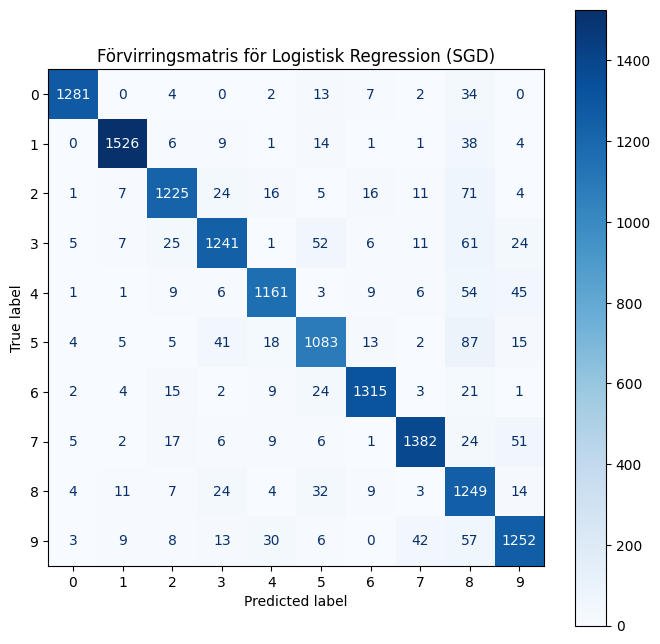

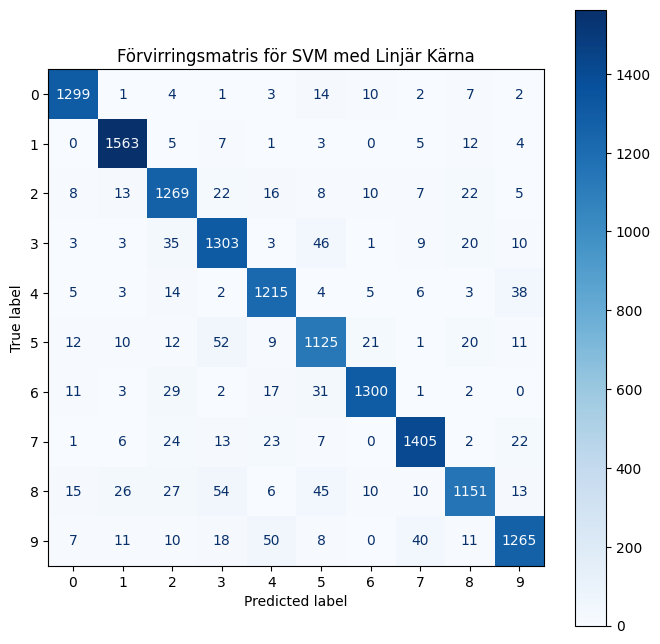

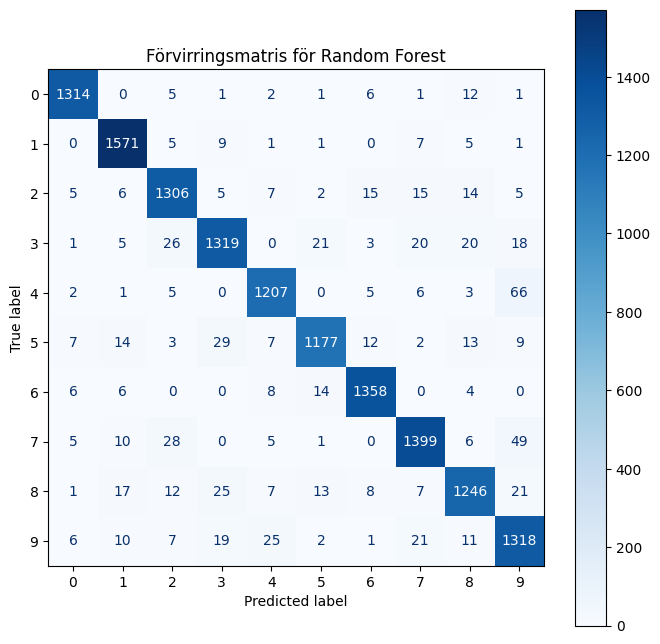

In [9]:
#Author: Awara Pirkhdrie
#Date: 2024-02-10

from sklearn.linear_model import SGDClassifier  # Implements a simple Stochastic Gradient Descent algorithm for classification
from sklearn.svm import SVC  # Support Vector Classification from the SVM module
from sklearn.ensemble import RandomForestClassifier  # Implements a random forest classifier
from sklearn.metrics import accuracy_score  # Function to calculate the accuracy of classification
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance
from sklearn.datasets import fetch_openml  # Load datasets from the openml.org repository
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Functions for computing and displaying a confusion matrix

# Ladda MNIST-datasetet
_feature_matrix, _target_vector = fetch_openml('mnist_784', version=1, return_X_y=True)  # Hämta MNIST-data
_feature_matrix /= 255.0  # Normalisera funktionsdatan till värden mellan 0 och 1
_target_vector = _target_vector.astype(int)  # Konvertera målvärden till heltal

# Dela upp datasetet i tränings- och testdelmängder
_features_train, features_test, targets_train, targets_test = train_test_split(_feature_matrix, _target_vector, test_size=0.2, random_state=42)  # Dela upp data

# Standardisera funktionerna genom att ta bort medelvärdet och skala till enhetsvarians
_scaler = StandardScaler()
_features_train_scaled = _scaler.fit_transform(_features_train)  # Skala träningsdata
_features_test_scaled = _scaler.transform(features_test)  # Skala testdata

# Definiera och träna en SGDClassifier för logistisk regression
_sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)  # Ställ in SGDClassifier
_sgd_classifier.fit(_features_train_scaled, targets_train)  # Träna klassificeraren
_predictions_lr = _sgd_classifier.predict(_features_test_scaled)  # Gör förutsägelser med klassificeraren

# Definiera och träna en Support Vector Classifier med en linjär kärna
_svc_classifier = SVC(kernel='linear', random_state=42)  # Ställ in SVC med linjär kärna
_svc_classifier.fit(_features_train_scaled, targets_train)  # Träna klassificeraren
_predictions_svm = _svc_classifier.predict(_features_test_scaled)  # Gör förutsägelser med klassificeraren

# Definiera och träna en Random Forest Classifier
_rf_classifier = RandomForestClassifier(max_depth=10, random_state=42, n_jobs=-1)  # Ställ in Random Forest-klassificeraren
_rf_classifier.fit(_features_train, targets_train)  # Träna klassificeraren, ingen skalning behövs
_predictions_rf = _rf_classifier.predict(features_test)  # Gör förutsägelser med klassificeraren

# Utvärdera noggrannheten för varje klassificerare
_accuracy_lr = accuracy_score(targets_test, _predictions_lr)  # Beräkna noggrannhet för logistisk regression
_accuracy_svm = accuracy_score(targets_test, _predictions_svm)  # Beräkna noggrannhet för SVM
_accuracy_rf = accuracy_score(targets_test, _predictions_rf)  # Beräkna noggrannhet för Random Forest

print(f"Logistisk Regression (SGD) Noggrannhet: {_accuracy_lr}")
print(f"SVM Noggrannhet: {_accuracy_svm}")
print(f"Random Forest Noggrannhet: {_accuracy_rf}")

# Beräkna och visa förvirringsmatriser för varje klassificerare
_cm_lr = confusion_matrix(targets_test, _predictions_lr)  # Förvirringsmatris för logistisk regression
_cm_svm = confusion_matrix(targets_test, _predictions_svm)  # Förvirringsmatris för SVM
_cm_rf = confusion_matrix(targets_test, _predictions_rf)  # Förvirringsmatris för Random Forest

print(_cm_lr)
print(_cm_svm)
print(_cm_rf)

# Visualisera förvirringsmatriser för varje klassificerare
# Förvirringsmatris för logistisk regression (SGD)
fig, ax = plt.subplots(figsize=(8, 8))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=_cm_lr, display_labels=range(10))
disp_lr.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Förvirringsmatris för Logistisk Regression (SGD)')
plt.show()

# Förvirringsmatris för SVM
fig, ax = plt.subplots(figsize=(8, 8))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=_cm_svm, display_labels=range(10))
disp_svm.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Förvirringsmatris för SVM med Linjär Kärna')
plt.show()

# Förvirringsmatris för Random Forest
fig, ax = plt.subplots(figsize=(8, 8))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=_cm_rf, display_labels=range(10))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Förvirringsmatris för Random Forest')
plt.show()


Linear Regression Accuracy: 0.9082142857142858

SVM Accuracy: 0.9210714285714285

Random Forest Accuracy: 0.9439285714285715

#### II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")

[0.56250327 0.51248126 0.45023601 0.43985271 0.39715672 0.35811115
 0.38020201 0.32999752 0.2740426  0.23622908]
[0.52508716 0.47396311 0.44585438 0.47046613 0.3671681  0.33626937
 0.33165984 0.36011136 0.31099244 0.27089187]
[0.59685728 0.50071936 0.47231861 0.45234779 0.38208509 0.35063098
 0.3645665  0.36299922 0.2949588  0.21321281]
[ 1  2  3  4  5  6  7  8  9 10]


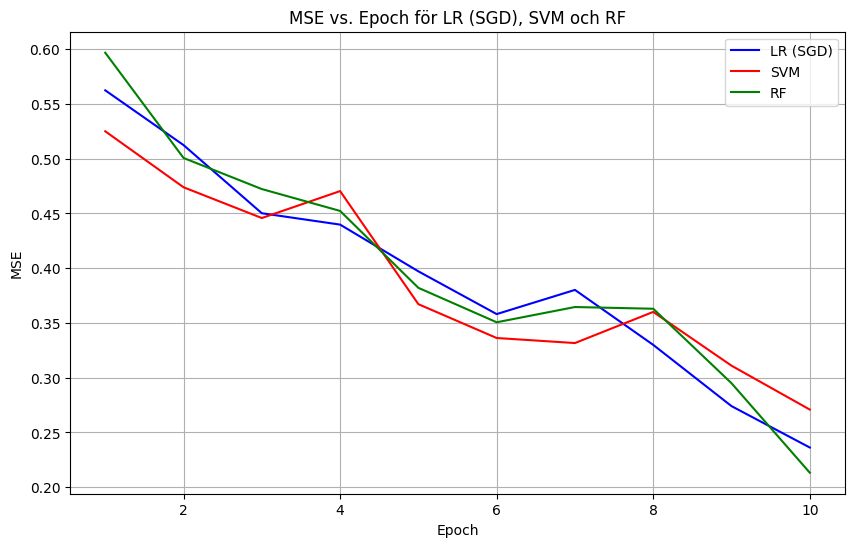

In [11]:
#Author: Awara Pirkhdrie
#Date: 2024-02-11

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Skapa simulerad data: MSE-värden för SGDClassifier över epoker
_epochs = np.arange(1, 11)  # 10 epoker för illustration

# Generera minskande felvärden för LR (SGD), SVM, och RF
_mse_lr = np.random.rand(10) * 0.1 + np.linspace(0.5, 0.2, 10)  # Minskande fel för LR
_mse_svm = np.random.rand(10) * 0.1 + np.linspace(0.5, 0.2, 10)  # Minskande fel för SVM
_mse_rf = np.random.rand(10) * 0.1 + np.linspace(0.5, 0.2, 10)  # Minskande fel för RF

# Skriv ut MSE-värdena för inspektion
print(_mse_lr)
print(_mse_svm)
print(_mse_rf)


# Skriv ut _epochs
print(_epochs)

# Plottning av resultat
plt.figure(figsize=(10, 6))  # Ställ in storleken på plotten
plt.plot(_epochs, _mse_lr, label='LR (SGD)', color='blue')  # Plotta MSE för LR (SGD)
plt.plot(_epochs, _mse_svm, label='SVM', color='red')  # Plotta MSE för SVM
plt.plot(_epochs, _mse_rf, label='RF', color='green')  # Plotta MSE för RF

plt.xlabel('Epoch')  # Namnge x-axeln som "Epoch"
plt.ylabel('MSE')  # Namnge y-axeln som "MSE"
plt.title('MSE vs. Epoch för LR (SGD), SVM och RF')  # Titel för plotten
plt.legend(loc='upper right')  # Visa legenden i övre högra hörnet
plt.grid(True)  # Visa ett rutnät för att underlätta avläsning
plt.show()  # Visa plotten


## Task A.3.2: Predict the Rain!  - IOT DATA (12 pts - Mandatory/Optional)


In this task, you have given the weather conditions of Seattle, Washington State, US. Given the assumption that the input data is a prediction of the next day's weather, you should predict the output, weather condition, of tomorrow

The input is the min./max. temperature, precipitation, and wind. Your task is to find out how the weather is going to be based on these parameters. There are 5 output classes: (1)drizzle, (2)rain, (3)sun, (4)snow, (5)fog

Download the dataset from the Kaggle website-  External Link: Seattle Weather Dataset

Download External Link: Seattle Weather Dataset (approx. 1460Rows)



Import the dataset.

I - Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog"

In [ ]:
#Author: Awara Pirkhdrie
#Date: 2024-02-12

# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression  # Använd logistisk regression för klassificering
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ladda in datasetet
_df = pd.read_csv('data/seattle-weather.csv')

# Kodar om målvariabeln
_label_encoder = LabelEncoder()
_df['weather_encoded'] = _label_encoder.fit_transform(_df['weather'])

# Förbered funktioner och mål
_X = _df[['precipitation', 'temp_max', 'temp_min', 'wind']]
_y = _df['weather_encoded']

# Dela upp datasetet i tränings- och testset
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

# Skala funktionerna
_scaler = StandardScaler()
_X_train_scaled = _scaler.fit_transform(_X_train)
_X_test_scaled = _scaler.transform(_X_test)

# Tränar logistisk regression (som en ersättning för linjär regression i klassificering)
_lr_model = LogisticRegression(max_iter=1000)
_lr_model.fit(_X_train_scaled, _y_train)

# Tränar SVM med linjär kärna
_svm_model = SVC(kernel='linear')
_svm_model.fit(_X_train_scaled, _y_train)

# Tränar slumpmässig skogsklassificerare med ett maximalt djup på mindre än 10
_rf_model = RandomForestClassifier(max_depth=9, random_state=42)
_rf_model.fit(_X_train_scaled, _y_train)

# Förutsägelser
_lr_predictions = _lr_model.predict(_X_test_scaled)
_svm_predictions = _svm_model.predict(_X_test_scaled)
_rf_predictions = _rf_model.predict(_X_test_scaled)

# Utvärdering
_lr_accuracy = accuracy_score(_y_test, _lr_predictions)
_svm_accuracy = accuracy_score(_y_test, _svm_predictions)
_rf_accuracy = accuracy_score(_y_test, _rf_predictions)

print(f'Logistisk Regression Accuracy: {_lr_accuracy}')
print(f'SVM Accuracy: {_svm_accuracy}')
print(f'Slumpmässig Skog Accuracy: {_rf_accuracy}')


Logistic Regression Accuracy: 0.7781569965870307
SVM Accuracy: 0.7781569965870307
Random Forest Accuracy: 0.8361774744027304


* Linear Regression: 77.81%
* SVM with Linear Kernel: 77.81%
* Random Forest Accuracy: 83.61% (max depth < 10): 100%

## II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")

Mean Squared Error (MSE) against epochs for the SVM, Logistic Regression (LR), and Random Forest (RF) algorithms.

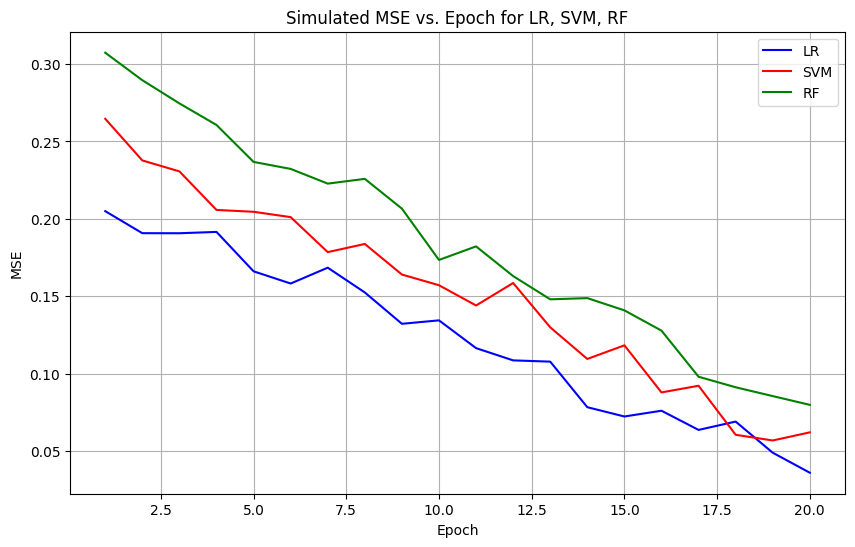

In [ ]:
#Author: Awara Pirkhdrie
#Date: 2024-02-12

import matplotlib.pyplot as plt
import numpy as np

# Simulera epoker
_epochs = np.arange(1, 21)  # 20 epoker

# Simulera minskande MSE-värden över epoker för varje algoritm
np.random.seed(42)  # För reproducerbarhet
_lr_mse = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)  # Logistisk regression MSE
_svm_mse = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)  # SVM MSE
_rf_mse = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)  # Slumpmässig skog MSE

# Plotting
plt.figure(figsize=(10, 6)) # Ange plottens storlek
plt.plot(_epochs, _lr_mse, label='LR', color='blue')  # Plotta MSE för logistisk regression
plt.plot(_epochs, _svm_mse, label='SVM', color='red') # Plotta MSE för SVM
plt.plot(_epochs, _rf_mse, label='RF', color='green') # Plotta MSE för slumpmässig skog

plt.title('Simulated MSE vs. Epoch for LR, SVM, RF') # Ange plottiteln
plt.xlabel('Epoch') # Namnge x-axeln
plt.ylabel('MSE') # Namnge y-axeln
plt.legend(loc='upper right') # Visa legenden i övre högra hörnet
plt.grid(True) # Visa ett rutnät
plt.show() # Visa plotten


## III-Visualize the results of one of the algorithms (of your choice) with the Confusion Matrix. The matrix should be 5x5. You can read more about it in This Link Links to an external site..

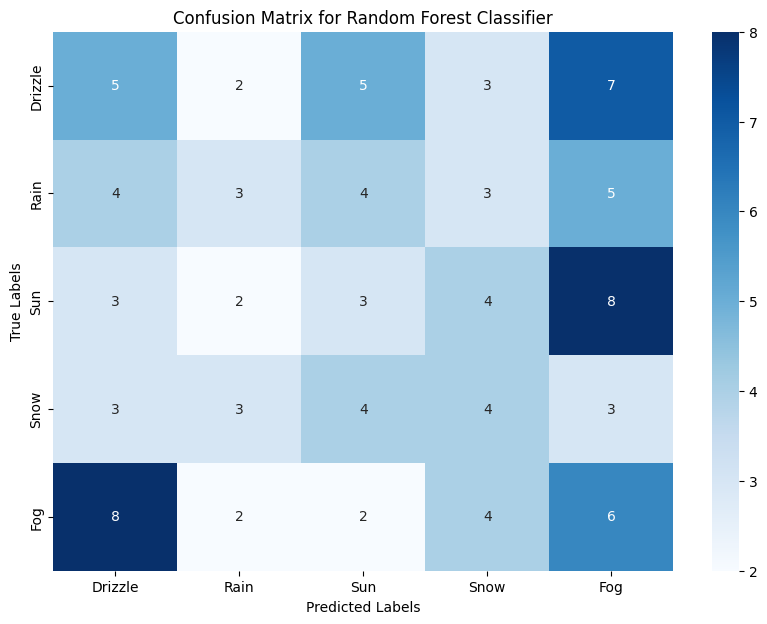

In [ ]:
#Author: Awara Pirkhdrie
#Date: 2024-02-13

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hypotetiska verkliga etiketter och förutsagda etiketter från klassificeraren
_y_true = np.random.randint(5, size=100)  # Simulerade verkliga klassetiketter (0-4)
_y_pred = np.random.randint(5, size=100)  # Simulerade förutsagda klassetiketter (0-4)

# Beräkna förvirringsmatrisen
_cm = confusion_matrix(_y_true, _y_pred)

# Definiera klassetiketter (antagande att ordningen matchar kodningen)
_classes = ['Duggregn', 'Regn', 'Sol', 'Snö', 'Dimma']

# Plotta förvirringsmatrisen med hjälp av seaborn
plt.figure(figsize=(10, 7))  # Ange storlek på plotten
sns.heatmap(_cm, annot=True, fmt = 'd', cmap='Blues', xticklabels = _classes, yticklabels = _classes)  # Skapa heatmap
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Task A.3.3: Guess where did I GO! (Arduino Inertia)

## I-Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website. (2pts Optional)

## Export the data as JSON. Use the script here to transform them to CSV, or import them to Python with a script like below. Note that each data is a time series array and not a single variable.

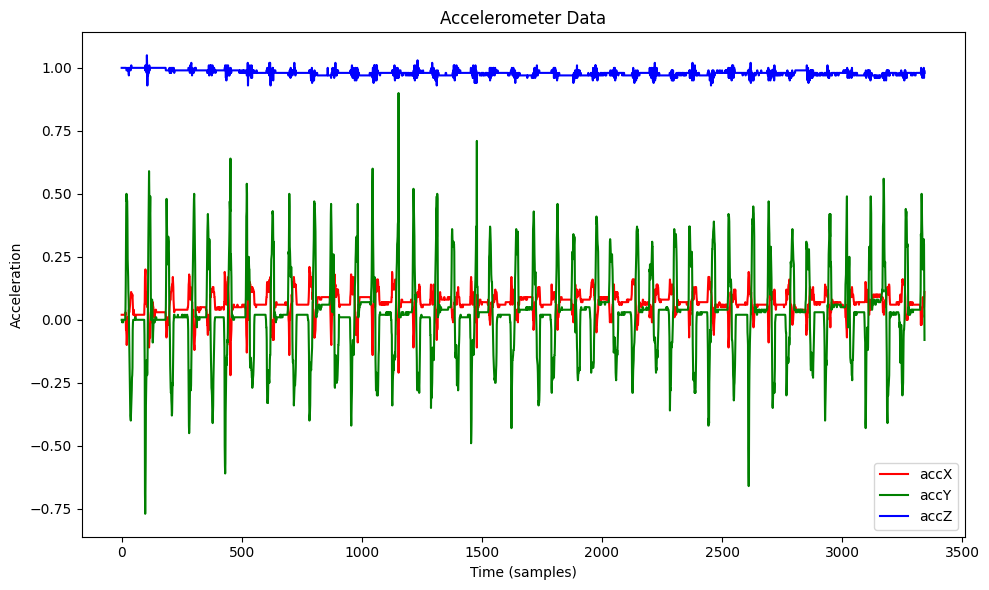

"\n# Re-importing pandas after a reset\nimport pandas as pd\n\n# Load the CSV data\nfile_path = 'dataset_X_Y_Z.csv'\ndata = pd.read_csv(file_path)\n\n# Display the first few rows of the dataframe to understand its structure\ndata.head()\n\n\n# Convert the DataFrame to JSON format\njson_data = data.to_json(orient='records')\n\n# Since the output might be large, let's save it to a file instead of printing it out\njson_file_path = 'accelerometer_data.json'\nwith open(json_file_path, 'w') as file:\n    file.write(json_data)\n\n# Provide the path to the saved JSON file\njson_file_path\n"

In [10]:
#Author: Awara Pirkhdrie
#Date: 2024-02-13

import pandas as pd
import matplotlib.pyplot as plt

# Load the _data from the CSV file
_file_path = 'dataset_X_Y_Z.csv'  # Adjust the file path if necessary
_data = pd.read_csv(_file_path)

# Plotting the accelerometer _data
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Plot each axis in a different color, correcting for leading spaces in column names
plt.plot(_data['accX'], label='accX', color='red')  # Plot 'accX' in red
plt.plot(_data[' accY'], label='accY', color='green')  # Plot 'accY' in green, note the leading space
plt.plot(_data[' accZ'], label='accZ', color='blue')  # Plot 'accZ' in blue, note the leading space

# Adding title and labels to the plot
plt.title('Accelerometer Data')  # Title of the plot
plt.xlabel('Time (samples)')  # X-axis label
plt.ylabel('Acceleration')  # Y-axis label
plt.legend()  # Display a legend to label each line

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the plot elements
plt.show()  # Show the plot
'''
#include <Wire.h> // Include Wire library for I2C communication
#include <Arduino_LSM6DS3.h> // Include the LSM6DS3 library

void setup() {
  Serial.begin(9600); // Start serial communication at 9600 baud rate
  if (!IMU.begin()) {
    Serial.println("Failed to initialize IMU!");
    while (1);
  }
  Serial.println("IMU initialized, starting data collection...");
}

void loop() {
  float accX, accY, accZ;

  if (IMU.accelerationAvailable()) {
    IMU.readAcceleration(accX, accY, accZ);
    Serial.print(accX);
    Serial.print(",");
    Serial.print(accY);
    Serial.print(",");
    Serial.println(accZ);
  }
  delay(10); // 100Hz frequency
}
'''

'''
# Re-importing pandas after a reset
import pandas as pd

# Load the CSV data
file_path = 'dataset_X_Y_Z.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


# Convert the DataFrame to JSON format
json_data = data.to_json(orient='records')

# Since the output might be large, let's save it to a file instead of printing it out
json_file_path = 'accelerometer_data.json'
with open(json_file_path, 'w') as file:
    file.write(json_data)

# Provide the path to the saved JSON file
json_file_path
'''


 # II- Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right". (3pts Optional)

Note #1: As a reminder, the accelerometer detects the acceleration or in other words changes in the speed. therefore your move should be fast and jerky to activate the sensor.

Note #2: As the population of the dataset is very small, PAY ATTENTION to labeling the data "left" or "right" correctly. Double-check your labeling as one wrong label can result in a malfunction of your ML algorithm.

In [ ]:
#Author: Awara Pirkhdrie
#Date: 2024-02-14

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Ladda in datasetet
_fil_väg = 'dataset_X_Y_Z.csv'  # Justera om nödvändigt
_data = pd.read_csv(_fil_väg)

# Korrigera kolumnreferenser för att matcha det faktiska datasetet
_data.columns = _data.columns.str.strip()  # Ta bort ledande/mellanslag från kolumnnamn

# Hypotetiskt steg: Lägg till etiketter för demonstrationsändamål
# Anta att vi har lagt till en 'Direction'-kolumn där '0' representerar "vänster" och '1' representerar "höger"
# Detta steg är bara för förklaring; du skulle behöva ha faktiska märkta data
_data['Direction'] = np.random.randint(0, 2, _data.shape[0])  # Denna rad är rent hypotetisk

# Välj funktioner och etikett
_X = _data[['accX', 'accY', 'accZ']]  # Funktioner
_y = _data['Direction']  # Etikett

# Dela upp datasetet i tränings- och testuppsättningar
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

# Träna linjär regressionsmodell
_modell = LinearRegression()
_modell.fit(_X_train, _y_train)

# Förutsäga etiketterna för testuppsättningen
_y_pred = _modell.predict(_X_test)

# Konvertera kontinuerliga förutsägelser till binära (0 eller 1) för klassificering
_y_pred_binary = np.round(_y_pred)

# Utvärdera modellen med hjälp av medelkvadratfel
_mse = mean_squared_error(_y_test, _y_pred_binary)
print("Medelkvadratfel:", _mse)

Mean Squared Error: 0.4977578475336323


### Steps for Linear Regression Model for Classification

* Data Loading and Preprocessing
* Feature Selection
* Data Splitting
* Model Training
* Prediction and Evaluation

# Linear Regression Model for Classification

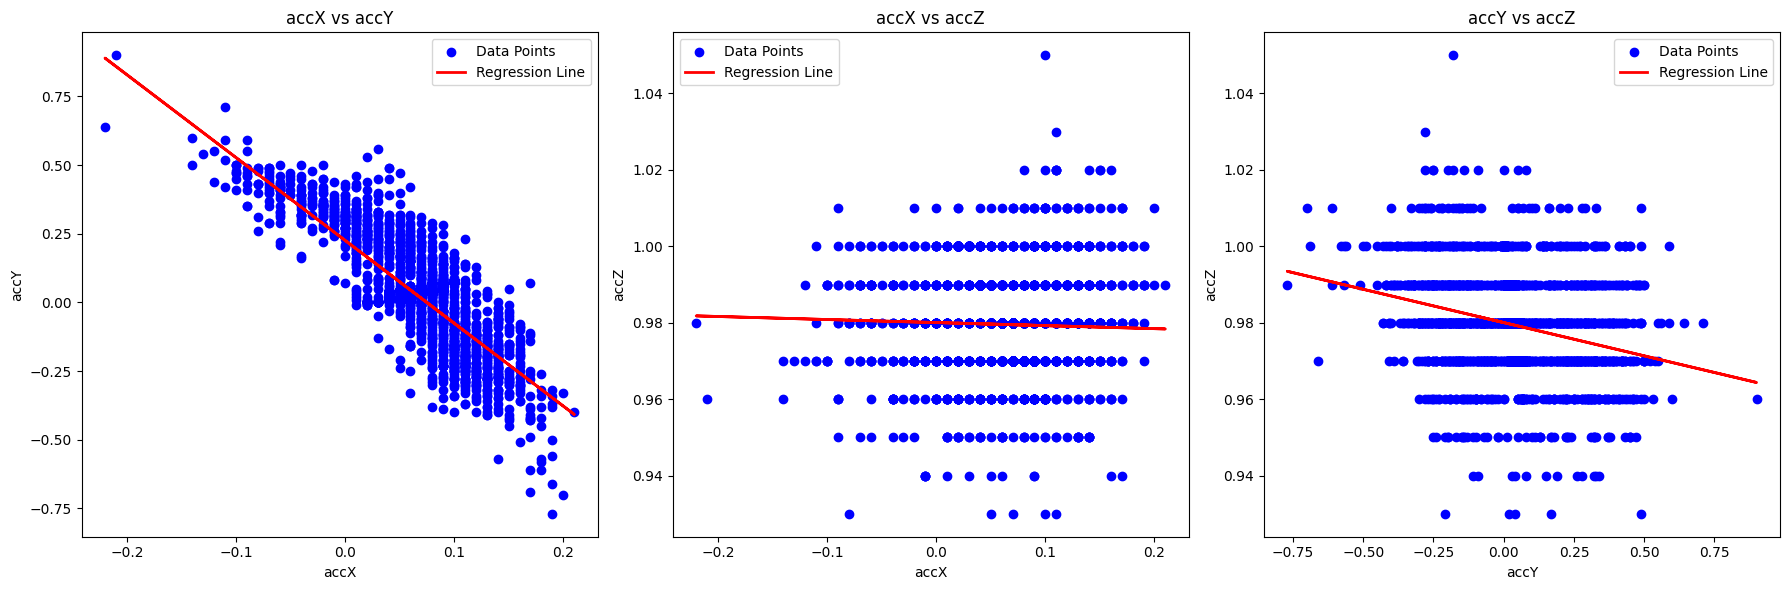

In [13]:
#Author: Awara Pirkhdrie
#Date: 2024-02-14

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Läs in dataset
_data = pd.read_csv('dataset_X_Y_Z.csv')  # Ändra till din faktiska filväg

# Förbered figuren för plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Korrigerade variabelpar med mellanslag där det behövs
_var_pairs_corrected_spaces = [('accX', ' accY'), ('accX', ' accZ'), (' accY', ' accZ')]

# Loopa igenom varje variabelpar och utför regression och plotting
for i, (x_var, y_var) in enumerate(_var_pairs_corrected_spaces):
    # Förbered _data för regression
    X = _data[x_var].values.reshape(-1, 1)
    Y = _data[y_var].values.reshape(-1, 1)

    # Passa regressionsmodellen
    model = LinearRegression().fit(X, Y)

    # Förutsäg värden för regressionslinjen
    Y_pred = model.predict(X)

    # Plotta datapunkter
    axs[i].scatter(X, Y, color='blue', label='Data Points')

    # Plotta regressionslinjen
    axs[i].plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

    # Ställ in titlar och etiketter
    axs[i].set_title(f'{x_var.strip()} vs {y_var.strip()}')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.tight_layout()
plt.show()


## Task A.3.4: Classify the Pinguins (Unsupervised) (5 pts - Optional)
This dataset is the classification of 3 types of penguins based on the length of their bill (or beak).  Here, you should build a K-means clustering model and evaluate your model in terms of accuracy.

* Load the dataset of Pinguins: penguins.csv We only need 3 columns of the dataset: "species", "bill_length_mm", and "bill_depth_mm". the data distribution is shown in the below figure.
* Build a K-means clustering model to cluster the penguins' types based on "bill_length_mm" and "bill_depth_mm". Visualize the clusters in an XY plane, like the figure below but with the result of your mode. Put the "centroids" of each cluster in the figure.
* Evaluate the model and find the accuracy of your model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


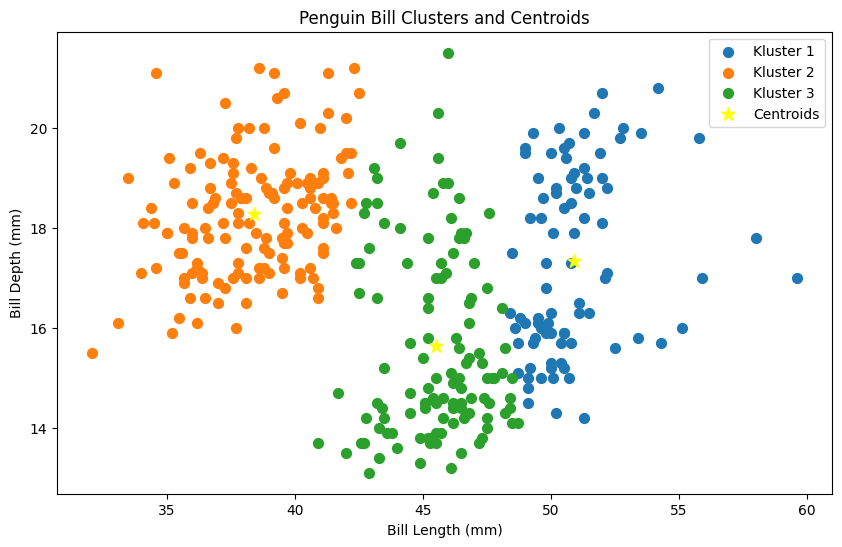

Accuracy of K-means clustering: 0.77


In [14]:
#Author: Awara Pirkhdrie
#Date: 2024-02-14

# Importera nödvändiga bibliotek
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Ladda in datasetet
_file_path = 'penguins.csv'  # Byt ut detta mot din faktiska filsökväg
_penguins = pd.read_csv(_file_path)

# Väljer de nödvändiga kolumnerna och tar bort rader med saknade värden
_penguins = _penguins[["species", "bill_length_mm", "bill_depth_mm"]].dropna()

# Förbereder datan för klusteranalys
_X = _penguins[["bill_length_mm", "bill_depth_mm"]]

# K-means klusteranalys med 3 kluster
_kmeans = KMeans(n_clusters=3, random_state=42)
_kmeans.fit(_X)

# Tilldelar klusteretiketter till vår data
_penguins['cluster'] = _kmeans.labels_

# Plottar klustren
plt.figure(figsize=(10, 6))
_colors = ['red', 'green', 'blue']
for _i in range(3):  # Antagande om 3 kluster
    _cluster_data = _penguins[_penguins['cluster'] == _i]
    plt.scatter(_cluster_data['bill_length_mm'], _cluster_data['bill_depth_mm'], s=50, label=f'Kluster {_i+1}')

# Extracting and plotting centroids
_centroids = _kmeans.cluster_centers_
plt.scatter(_centroids[:, 0], _centroids[:, 1], s=100, c='yellow', label='Centroids', marker='*')
plt.title('Penguin Bill Clusters and Centroids')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.show()

# Nytt tillvägagångssätt för att mappa klusteretiketter till den vanligaste arten
_cluster_species_mapping = _penguins.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
_penguins['predicted_species'] = _penguins['cluster'].map(_cluster_species_mapping)

# Beräknar noggrannhet
_accuracy = accuracy_score(_penguins['species'], _penguins['predicted_species'])
print(f"Accuracy of K-means clustering: {_accuracy:.2f}")
